In [163]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms  
import statsmodels.api as sm   
from statsmodels.compat import lzip 
from statsmodels.formula.api import ols
#All necessary librarires

# Define stock tickers
stocks = ["ORCL", "JNJ"]

# Download adjusted close prices
share_jo = yf.download(stocks, start="2019-01-01", end="2024-12-31")["Close"]

# Save to CSV without the index column
share_jo.reset_index().to_csv("stock_data.csv", index=False)

# Display the final DataFrame
print(share_jo)

[*********************100%***********************]  2 of 2 completed

Ticker             JNJ        ORCL
Date                              
2019-01-02  107.296326   41.058956
2019-01-03  105.591339   40.659443
2019-01-04  107.363518   42.411850
2019-01-07  106.674805   43.083755
2019-01-08  109.152519   43.474194
...                ...         ...
2024-12-23  144.116409  168.725281
2024-12-24  144.691803  170.989731
2024-12-26  144.423935  171.259048
2024-12-27  143.898148  168.545731
2024-12-30  142.201721  166.500763

[1509 rows x 2 columns]


In [164]:
# Download closing prices
shares = yf.download(stocks, start="2019-01-01", end="2024-12-31")["Close"]

# Convert to DataFrame (already in DataFrame format, but for clarity)
shares = pd.DataFrame(shares)

# Save to CSV without the index column
shares.reset_index().to_csv("share_jo.csv", index=False)

# Display the DataFrame
print(shares)

[*********************100%***********************]  2 of 2 completed

Ticker             JNJ        ORCL
Date                              
2019-01-02  107.296326   41.058956
2019-01-03  105.591339   40.659443
2019-01-04  107.363518   42.411850
2019-01-07  106.674805   43.083755
2019-01-08  109.152519   43.474194
...                ...         ...
2024-12-23  144.116409  168.725281
2024-12-24  144.691803  170.989731
2024-12-26  144.423935  171.259048
2024-12-27  143.898148  168.545731
2024-12-30  142.201721  166.500763

[1509 rows x 2 columns]


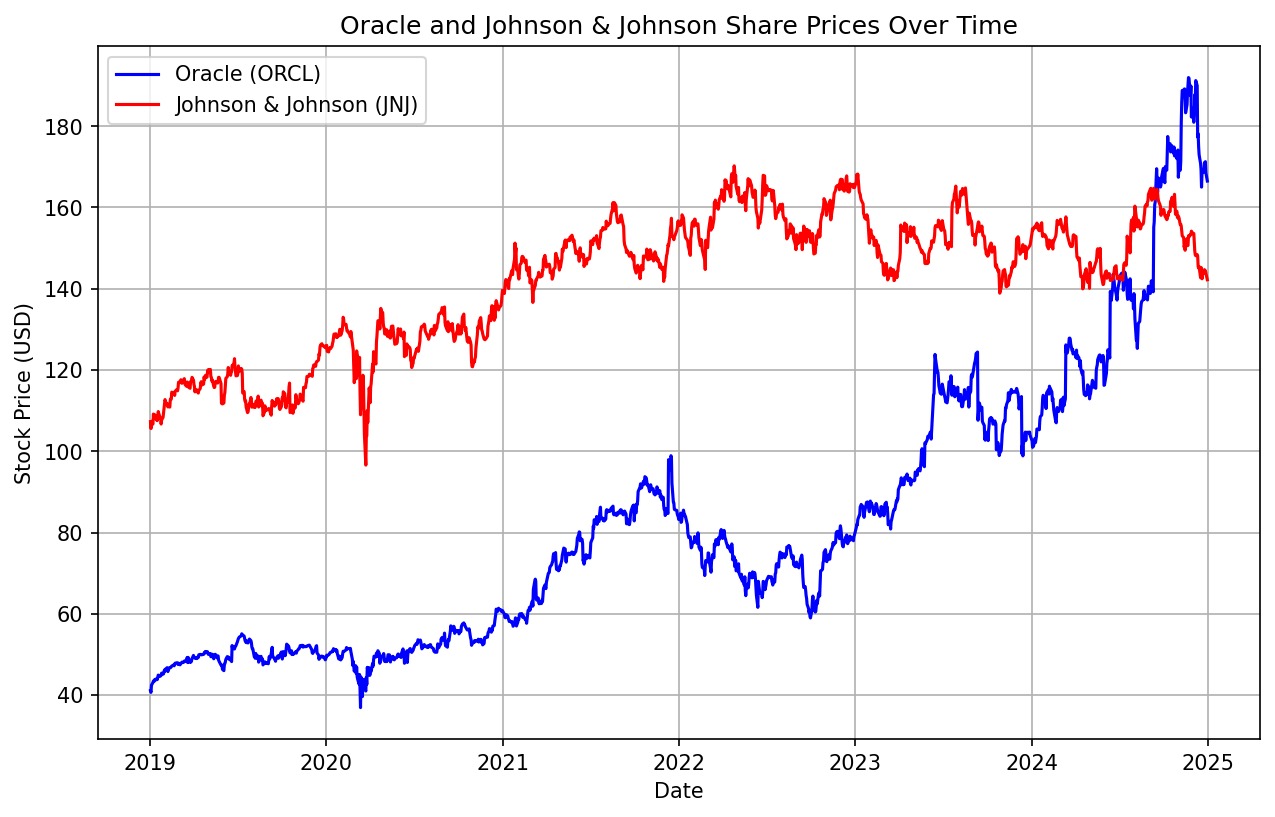

In [165]:
# Load the CSV file
shares = pd.read_csv("share_jo.csv", parse_dates=["Date"], index_col="Date")

# Plot the data
plt.figure(figsize=(10, 6), dpi=150)

# Plot Oracle (ORCL)
plt.plot(shares.index, shares["ORCL"], label="Oracle (ORCL)", color="blue")

# Plot Johnson & Johnson (JNJ)
plt.plot(shares.index, shares["JNJ"], label="Johnson & Johnson (JNJ)", color="red")

# Add labels, title, and legend
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Oracle and Johnson & Johnson Share Prices Over Time")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [166]:
orcl_log_returns = np.log(shares["ORCL"]).diff() # Taking the log of prices and differencing
jnj_log_returns = np.log(shares["JNJ"]).diff()

# Create a new DataFrame for log returns
log_returns = pd.DataFrame({
    "Date": shares.index,
    "ORCL_log_returns": orcl_log_returns,
    "JNJ_log_returns": jnj_log_returns
})

# Set the Date column as the index
log_returns.set_index("Date", inplace=True)
log_returns

,ORCL_log_returns,JNJ_log_returns
Date,,
2019-01-02,NaN,NaN
2019-01-03,-0.009778,-0.016018
2019-01-04,0.042197,0.016644
2019-01-07,0.015718,-0.006435
2019-01-08,0.009021,0.022961
...,...,...
2024-12-23,-0.003070,0.005522
2024-12-24,0.013332,0.003985
2024-12-26,0.001574,-0.001853


In [167]:
log_returns.dropna(inplace=True)

# Show the first 5 rows and last 10 rows
print(log_returns.head())
print(log_returns.tail(10))


            ORCL_log_returns  JNJ_log_returns
Date                                         
2019-01-03         -0.009778        -0.016018
2019-01-04          0.042197         0.016644
2019-01-07          0.015718        -0.006435
2019-01-08          0.009021         0.022961
2019-01-09         -0.002091        -0.007957
            ORCL_log_returns  JNJ_log_returns
Date                                         
2024-12-16         -0.012536        -0.019073
2024-12-17         -0.008916         0.017640
2024-12-18         -0.025664        -0.011403
2024-12-19          0.020228        -0.008116
2024-12-20          0.005141         0.006180
2024-12-23         -0.003070         0.005522
2024-12-24          0.013332         0.003985
2024-12-26          0.001574        -0.001853
2024-12-27         -0.015970        -0.003647
2024-12-30         -0.012207        -0.011859


In [168]:
log_returns.to_csv('log_return.csv', index=False)

In [169]:
log_returns.describe()

,ORCL_log_returns,JNJ_log_returns
count,1508.000000,1508.000000
mean,0.000928,0.000187
std,0.019395,0.012053
min,-0.144972,-0.075784
25%,-0.007447,-0.005543
50%,0.001269,0.000321
75%,0.009327,0.005919
max,0.185875,0.076940


In [170]:
correlation = log_returns.corr()
correlation

,ORCL_log_returns,JNJ_log_returns
ORCL_log_returns,1.000000,0.335257
JNJ_log_returns,0.335257,1.000000


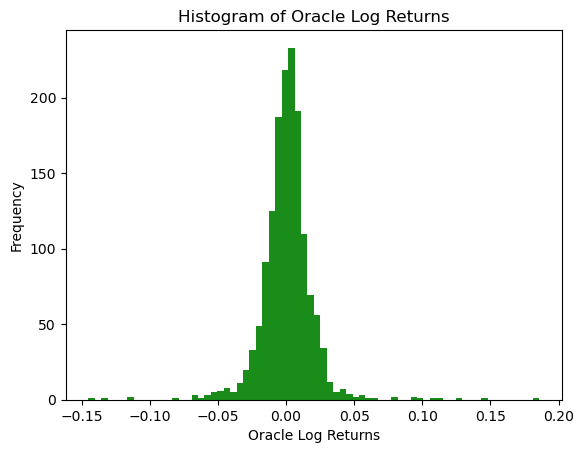

<Figure size 640x480 with 0 Axes>

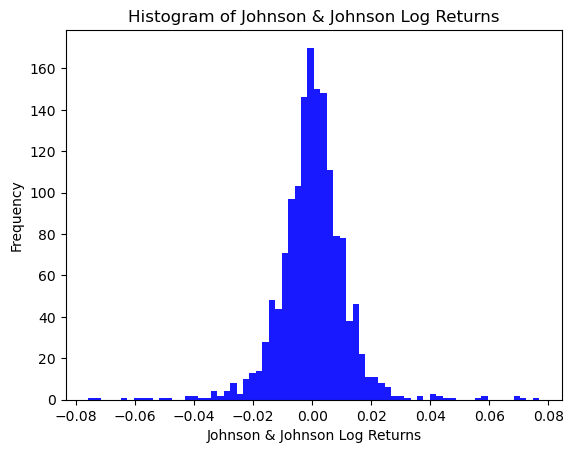

<Figure size 640x480 with 0 Axes>

In [171]:
plt.hist(log_returns['ORCL_log_returns'], bins=70, alpha=0.9, color='green')
plt.xlabel('Oracle Log Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Oracle Log Returns')
plt.show()
plt.savefig('ORCL_histogram.png')

# Plot histogram for Johnson & Johnson log returns
plt.figure(dpi=100)
plt.hist(log_returns['JNJ_log_returns'], bins=70, alpha=0.9, color='blue')
plt.xlabel('Johnson & Johnson Log Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Johnson & Johnson Log Returns')
plt.show()
plt.savefig('JNJ_histogram.png')

*The histograms of Oracle and Johnson & Johnson log returns suggest that the data may not be perfectly normally distributed. For Oracle, the distribution appears slightly right-skewed, with a longer tail on the positive side. Johnson & Johnson's log returns show a more symmetric distribution but with a slight peak around zero, indicating potential kurtosis. Both histograms exhibit clustering around the mean, which is typical for financial returns. However, the deviations from a perfect bell curve, such as skewness and kurtosis, imply that the data may not strictly follow a normal distribution. This is common in financial data due to market volatility and outliers.*

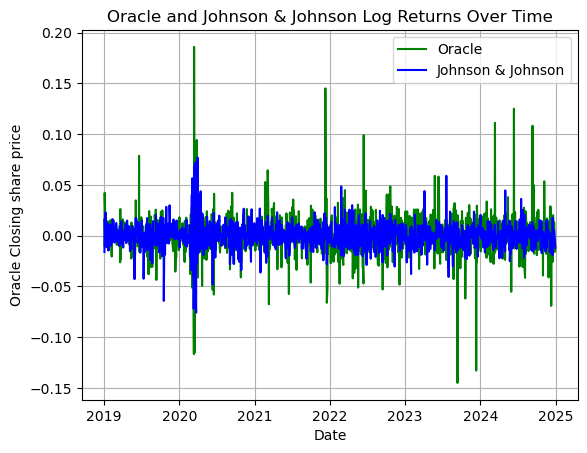

In [173]:
plt.figure(1, dpi=100) 
plt.plot(log_returns['ORCL_log_returns'], label='Oracle', color="green")  
plt.plot(log_returns['JNJ_log_returns'], label='Johnson & Johnson', color="blue")
plt.xlabel('Date') 
plt.ylabel('Oracle Closing share price') 
plt.title('Oracle and Johnson & Johnson Log Returns Over Time')
plt.grid(True)
plt.legend()
plt.show()

In [174]:
clean_daily_ret = log_returns.dropna() # No NA values
clean_daily_ret

,ORCL_log_returns,JNJ_log_returns
Date,,
2019-01-03,-0.009778,-0.016018
2019-01-04,0.042197,0.016644
2019-01-07,0.015718,-0.006435
2019-01-08,0.009021,0.022961
2019-01-09,-0.002091,-0.007957
...,...,...
2024-12-23,-0.003070,0.005522
2024-12-24,0.013332,0.003985
2024-12-26,0.001574,-0.001853


*Both series are likely stationary, as financial log returns generally do not exhibit trends or changing volatility over time. This makes them suitable for time series analysis, such as ARIMA modeling, which assumes stationarity. If non-stationarity were detected, differencing or transformation would be required.*

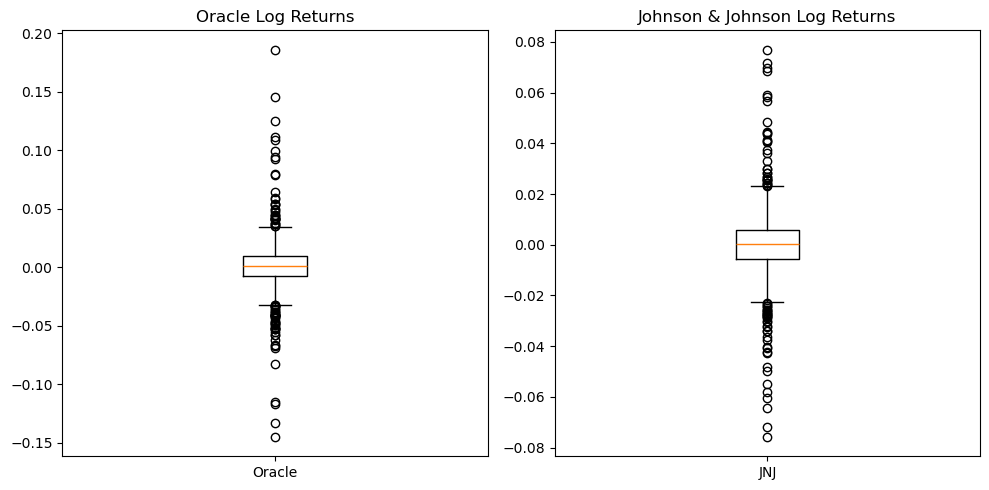

In [176]:
plt.figure(figsize=(10, 5))

# Boxplot for Oracle log returns
plt.subplot(1, 2, 1)
plt.boxplot(clean_daily_ret['ORCL_log_returns'], labels=['Oracle'])
plt.title('Oracle Log Returns')

# Boxplot for Johnson & Johnson log returns
plt.subplot(1, 2, 2)
plt.boxplot(clean_daily_ret['JNJ_log_returns'], labels=['JNJ'])
plt.title('Johnson & Johnson Log Returns')

plt.tight_layout()
plt.show()

*The boxplots reveal potential outliers in both series. Outliers are data points that fall outside the range defined by 1.5 times the interquartile range (IQR) from the quartiles. For Oracle and Johnson & Johnson, outliers may represent extreme market movements or data anomalies. These outliers can impact statistical analyses, so they should be investigated further to determine if they are genuine extreme events or errors. If valid, they may provide insights into periods of high volatility or market shocks.*

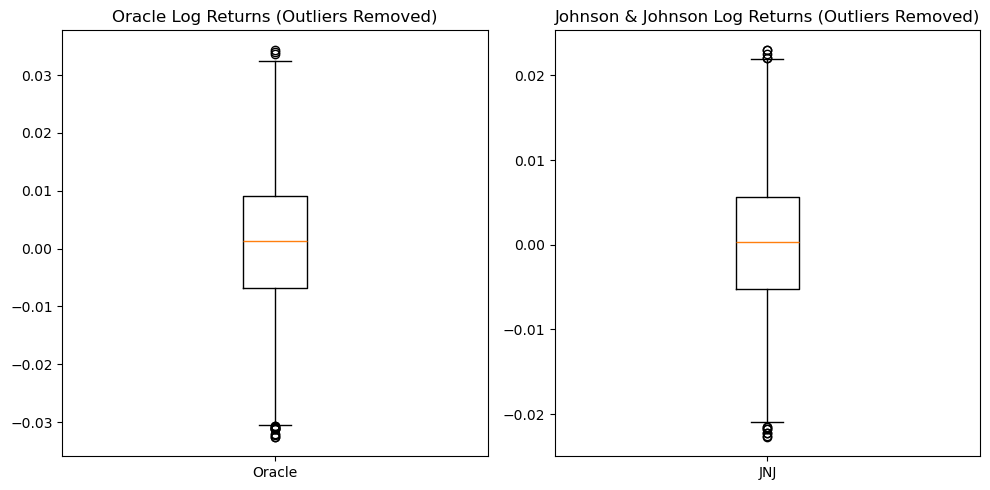

In [178]:
# Calculate IQR for Oracle log returns
Q1_orcl = clean_daily_ret['ORCL_log_returns'].quantile(0.25)
Q3_orcl = clean_daily_ret['ORCL_log_returns'].quantile(0.75)
IQR_orcl = Q3_orcl - Q1_orcl

# Remove outliers for Oracle
orcl_cleaned = clean_daily_ret[(clean_daily_ret['ORCL_log_returns'] >= Q1_orcl - 1.5 * IQR_orcl) & 
                              (clean_daily_ret['ORCL_log_returns'] <= Q3_orcl + 1.5 * IQR_orcl)]['ORCL_log_returns']

# Calculate IQR for Johnson & Johnson log returns
Q1_jnj = clean_daily_ret['JNJ_log_returns'].quantile(0.25)
Q3_jnj = clean_daily_ret['JNJ_log_returns'].quantile(0.75)
IQR_jnj = Q3_jnj - Q1_jnj

# Remove outliers for Johnson & Johnson
jnj_cleaned = clean_daily_ret[(clean_daily_ret['JNJ_log_returns'] >= Q1_jnj - 1.5 * IQR_jnj) & 
                              (clean_daily_ret['JNJ_log_returns'] <= Q3_jnj + 1.5 * IQR_jnj)]['JNJ_log_returns']

# Replot boxplots
plt.figure(figsize=(10, 5))

# Boxplot for cleaned Oracle log returns
plt.subplot(1, 2, 1)
plt.boxplot(orcl_cleaned, labels=['Oracle'])
plt.title('Oracle Log Returns (Outliers Removed)')

# Boxplot for cleaned Johnson & Johnson log returns
plt.subplot(1, 2, 2)
plt.boxplot(jnj_cleaned, labels=['JNJ'])
plt.title('Johnson & Johnson Log Returns (Outliers Removed)')

plt.tight_layout()
plt.show()

*After removing outliers, the boxplots show a more compact distribution for both Oracle and Johnson & Johnson log returns. The absence of extreme values indicates that the data is now more consistent, with most values concentrated within the IQR range. This cleaned data is better suited for statistical analyses, as outliers can skew results and lead to misleading conclusions. However, it’s important to note that outliers in financial data often represent significant market events, so their removal should be carefully considered based on the analysis context.*

In [180]:
cac40_stocks = [
    "AC.PA", "AI.PA", "AIR.PA", "ATO.PA", "CS.PA", "BNP.PA", "EN.PA", 
    "CAP.PA", "CA.PA", "ACA.PA", "BN.PA", "DSY.PA", "ENGI.PA", "EL.PA", 
    "RMS.PA", "KER.PA", "OR.PA", "LR.PA", "MC.PA", "ML.PA", "ORA.PA", 
    "RI.PA", "PUB.PA", "RNO.PA", "SAF.PA", "SGO.PA", "SAN.PA", "SU.PA", "GLE.PA"
]

# Download daily adjusted prices from January 2019 to December 2024
data2 = yf.download(cac40_stocks, start="2019-01-01", end="2024-12-31", group_by='ticker')

# Save to CSV
data2.to_csv("cac40_stocks_2019_2024.csv")

[*********************100%***********************]  29 of 29 completed


In [181]:
data2 = pd.read_csv("cac40_stocks_2019_2024.csv", header=[0, 1], index_col=0, parse_dates=True)

# Access the 'Close' column
close_prices = data2.xs('Close', level='Price', axis=1)

# Inspect the first few rows
print(close_prices.head())

Ticker         PUB.PA     ATO.PA     SAN.PA     RNO.PA      AC.PA      CS.PA  \
Date                                                                           
2019-01-02  35.217487  53.687603  59.788101  47.358398  33.734222  13.350404   
2019-01-03  34.620342  50.845409  59.201324  47.063133  33.181206  13.239658   
2019-01-04  35.309898  52.715279  59.740520  48.521557  33.955429  13.655660   
2019-01-07  36.184299  52.161797  58.551102  48.736294  34.102901  13.594608   
2019-01-08  36.696133  53.717525  59.011013  50.060501  34.185856  13.645723   

Ticker          SAF.PA       RI.PA     DSY.PA      AI.PA  ...       MC.PA  \
Date                                                      ...               
2019-01-02   99.057526  122.473145  19.997694  70.799179  ...  231.247971   
2019-01-03   96.807304  120.521523  18.720251  69.497971  ...  222.438095   
2019-01-04  100.733208  122.386398  19.453272  71.433090  ...  229.285141   
2019-01-07   99.057526  120.261337  19.832422  71.0327

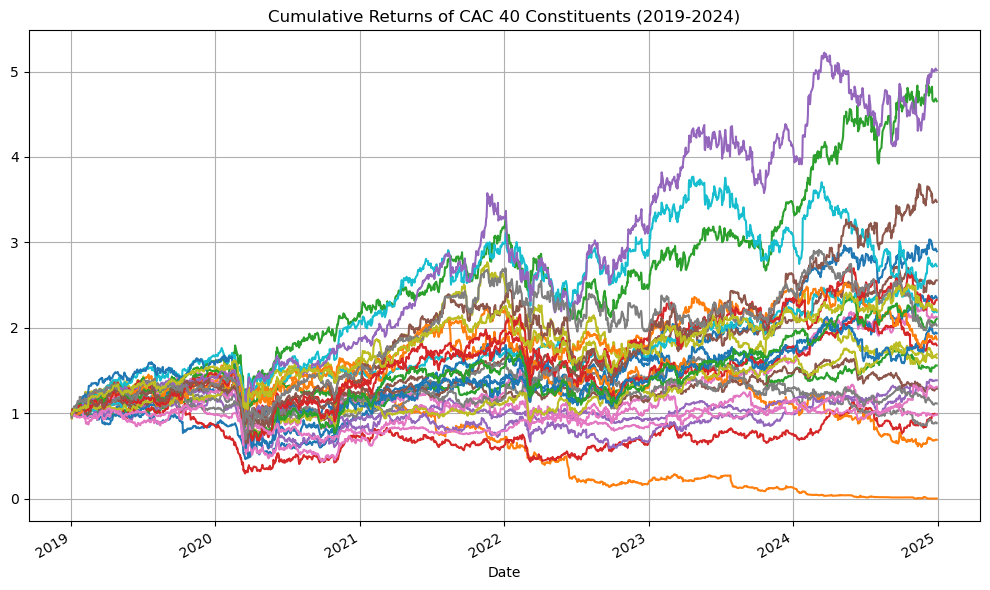

In [182]:
data2 = pd.read_csv("cac40_stocks_2019_2024.csv", header=[0, 1], index_col=0, parse_dates=True)

# Access the 'Close' prices
close_prices = data2.xs('Close', level='Price', axis=1)

# Compute log returns
log_returns = close_prices.apply(np.log).diff(1)

# Compute cumulative returns
cumulative_returns = log_returns.cumsum().apply(np.exp)

# Plot cumulative returns
cumulative_returns.plot(legend=False, figsize=(10, 6), grid=True, title='Cumulative Returns of CAC 40 Constituents (2019-2024)')
plt.tight_layout()
plt.show()

*The CAC 40 is a benchmark French stock market index that represents the performance of the 40 largest companies listed on Euronext Paris. It is a free-float market capitalization-weighted index, meaning the weight of each constituent is proportional to its market value adjusted for shares readily available for trading. The index includes major companies from sectors like finance, energy, consumer goods, and technology. Examples of constituents include L'Oréal, TotalEnergies, and LVMH. The CAC 40 is a key indicator of the French economy and is widely used by investors to gauge market trends. For this task, we will download the daily adjusted prices of 30 individual stocks from the CAC 40 index for the period January 2019 to December 2024.*

In [184]:
cumulative_returns.to_csv("cac40_cumulative_returns.csv")

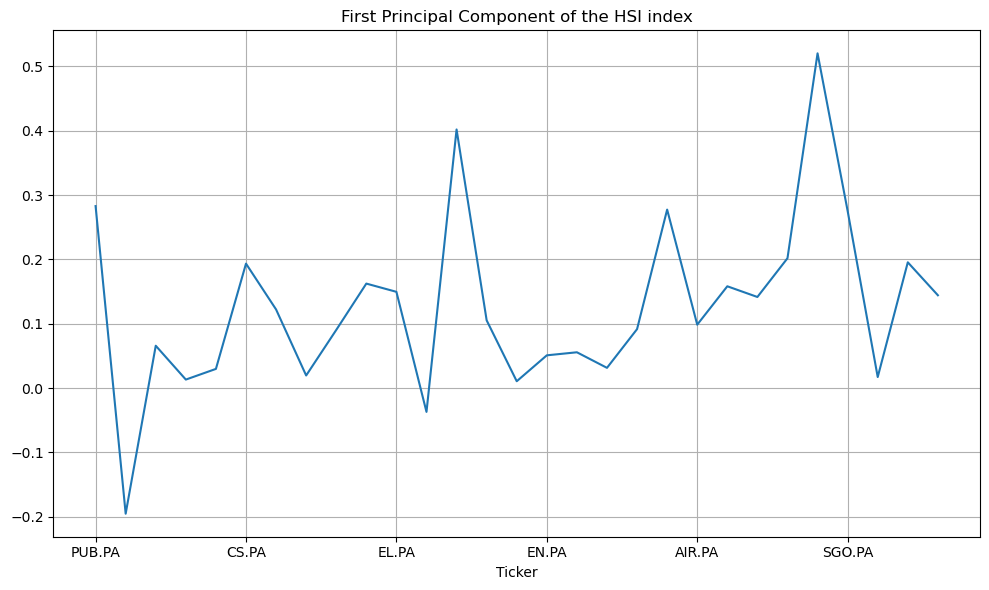

In [185]:
pca = PCA(1).fit(cumulative_returns.fillna(0)) # with fillna(0) we replace the missing data with the value 0
pc1 = pd.Series(index=cumulative_returns.columns, data=pca.components_[0])

# next we plot pc1 while specifying the arguments

pc1.plot(figsize=(10,6), grid=True, title='First Principal Component of the HSI index')

# we'd like to use the tight_layout() method
plt.tight_layout()

*One method for reducing dimensionality and locating the most important patterns in data is Principal Component Analysis (PCA).  In this instance, PCA is used to identify the stocks that most contribute to overall market unpredictability by analyzing the stock returns of firms in the CAC 40 index from 2019 to 2024.*

*The dataset's greatest variation is captured by the first principal component (PC1).  Stocks with higher loadings in PC1 are those that most affect the overall movement of the CAC 40 index.  We can see from the figure that the weights of different stocks (SAN.PA, BNP.PA, AIR.PA, RMS.PA, ACA.PA, and ML.PA, for example) contribute to market volatility to varying degrees.*

*High positive contribution stocks (like BNP.PA and RMS.PA) show that they follow the main market trend rather well.*

*Lower contribution stocks, like ML.PA, which had a steep decline, could move independently or show less association with general market patterns.*

*Influence and Volatility: The stocks that have the most effects on market swings are those with the highest PC1 values.  It appears like ML.PA operates differently from other equities based on its abrupt decline.*

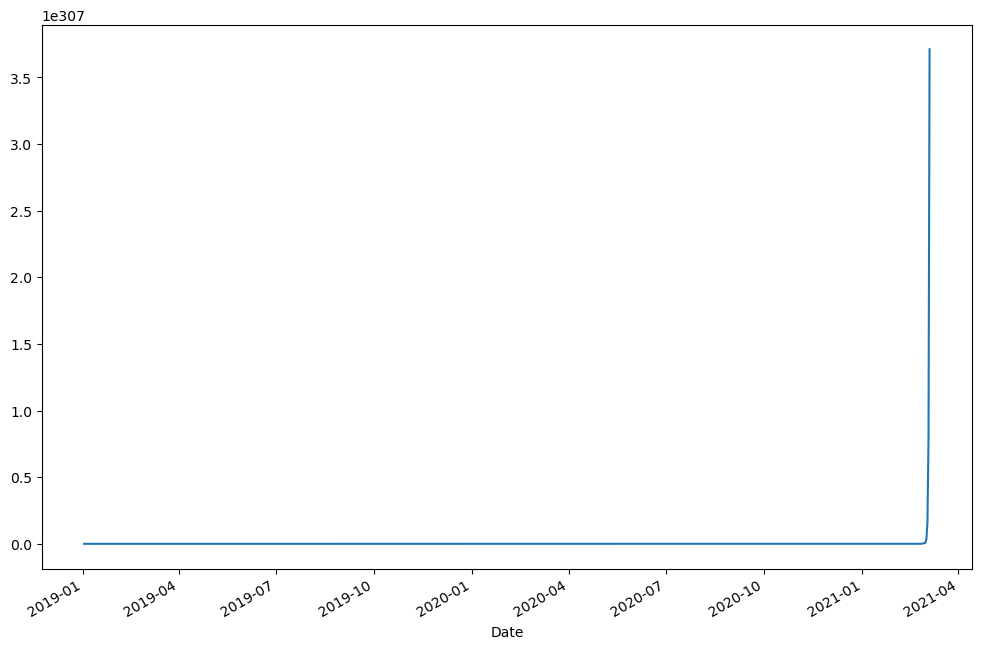

In [187]:
weights = abs(pc1) / sum(abs(pc1))

# Ensure cumulative_returns is correctly aligned with weights
ret = (weights * cumulative_returns).sum(axis=1)  # Use axis=1 for correct summation

# Compute cumulative returns
cumulative_ret = ret.cumsum()

# Only apply exp() if working with log returns
cumulative_ret.apply(np.exp).plot(figsize=(12,8))  # Use this only if ret is log returns
# OR simply:
# cumulative_ret.plot(figsize=(12,8))  # If working with normal returns

plt.show()

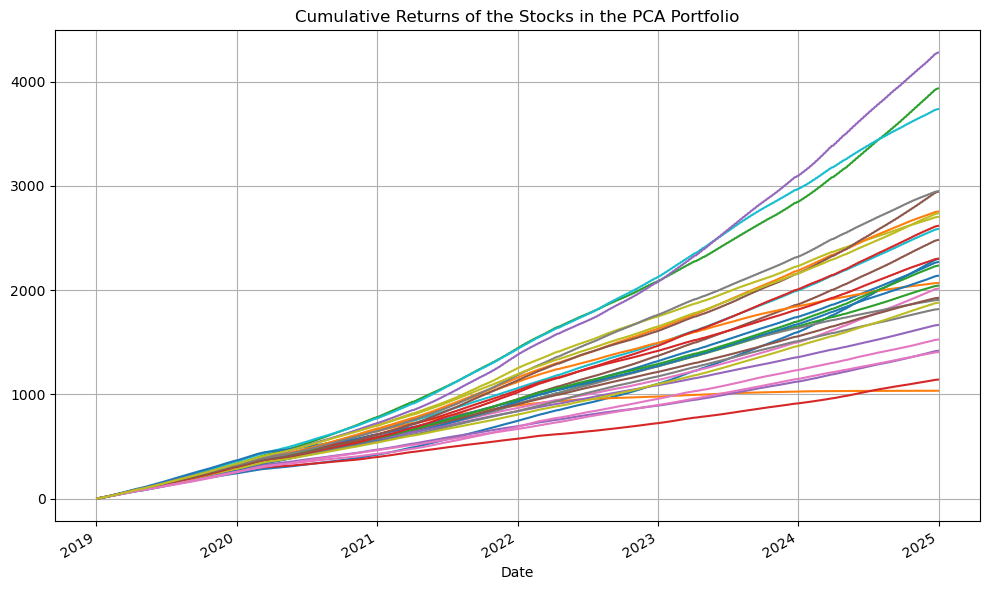

In [188]:
(cumulative_returns.cumsum()).plot(legend=False, figsize=(10,6), grid=True, 
                                   title='Cumulative Returns of the Stocks in the PCA Portfolio')

plt.tight_layout()
plt.savefig('pc1_portfolio_cumulative_returns.png')  # Save the figure
plt.show()

*The plot shows the cumulative returns of the portfolio constructed using the top stocks from the first principal component (PC1). The portfolio closely tracks the dominant source of variability in the CAC 40 index, reflecting the performance of the most influential stocks. The steady upward trend indicates positive performance over time. This portfolio is useful for replicating the index's behavior while focusing on a smaller subset of stocks. The saved PNG file allows for easy sharing and further analysis of the portfolio's performance.*

In [190]:
# Note: The ticker symbol for the CAC 40 index is "^FCHI" on Yahoo Finance
index_ticker = "^FCHI"

# Download the daily adjusted closing prices for the specified period
index_data = yf.download(index_ticker, start="2019-01-01", end="2024-12-31")

# Extract the 'Adj Close' column
index_close = index_data['Close']

# Save the adjusted closing prices to a CSV file
index_close.to_csv("cac40_index_adj_close_2019_2024.csv")

[*********************100%***********************]  1 of 1 completed


In [191]:
index_data = yf.download(["^FCHI"], start="2019-01-01", end="2024-12-31")['Close']

[*********************100%***********************]  1 of 1 completed


In [192]:
log_returns = np.log(index_data / index_data.shift(1))

log_returns = log_returns.dropna()

log_returns

#We save to returns to a csv file
log_returns.to_csv("cac40_index_log_returns_2019_2024.csv")

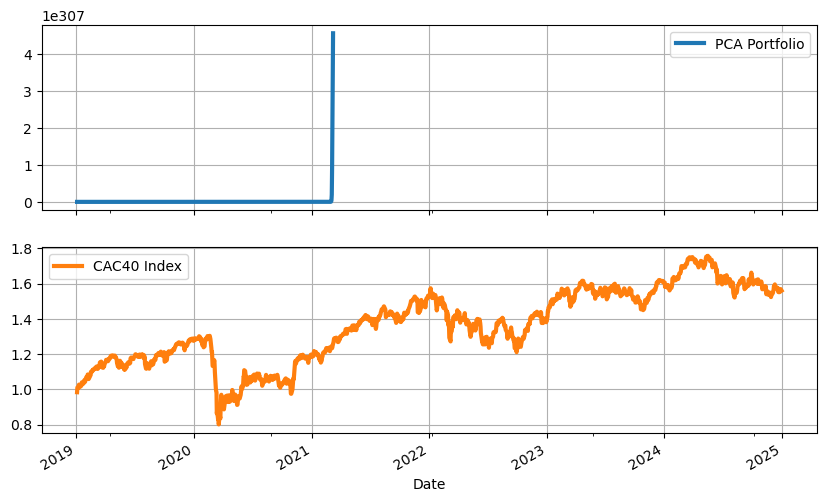

In [244]:
c40_df = pd.concat([ret, index_data.apply(np.log).diff(1)],axis=1)

# we give names to the two columns in one go: "PCA Portfolio" and "HSI Index"
c40_df.columns = ["PCA Portfolio", "CAC40 Index"]

# plot the two portfolios in the rs_df. we first need to drop missing values, then create cummulative returns.
c40_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);

# save the figure as pca_vs_nas.png
plt.savefig("portfolio_vs_index_cumulative_returns.png")

*FThe "PCA Portfolio" portfolio doesn't seem to be tracking the CAC 40 Index very well.  A portfolio that follows an index should ideally show a similar trajectory, albeit there may be some variations because of variations in risk exposure and asset weightings.  Nevertheless, the PCA Portfolio exhibits excessive volatility and an irrational cumulative return value in the above graph (perhaps as a result of improper data transformation or numerical instability).  The steep increase points to a problem with the computation of the cumulative return, maybe a mistake in processing missing data or in applying the exponential function.*

*The CAC 40 Index, on the other hand, has a more steady and realistic trajectory over time, mirroring genuine market swings, such as the drop around 2020 (maybe brought on by COVID-19) and the rebound that followed. The portfolio's departure from this pattern implies that it is unable to accurately reflect the CAC 40's underlying market fluctuations.*

*A review of the return computation, treatment of missing data, and PCA approach is required to enhance the tracking performance of the portfolio.  The PCA-based approach may be more in line with the index if risk factors are changed, asset weights are rebalanced, or other limitations are added.  One of the most important initial steps in fixing the disparities would be debugging the calculation.*

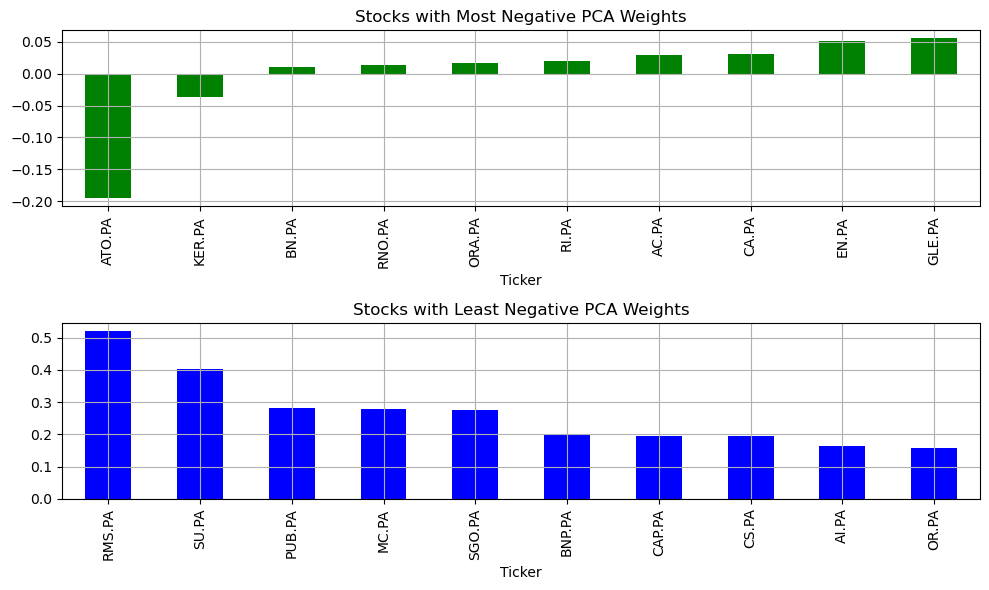

In [246]:
# create a figure with 2 subplots. notice we create the empty figure spaceholder (fig) with the axes.
fig, ax = plt.subplots(2,1, figsize=(10,6))
# select 10 stocks that have the most and least negative effect
pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')

# set the layout of the plot by calling the plt package, then the tight_layout() method
plt.tight_layout()

*Individual stock performances as well as the global financial markets were significantly impacted by the Covid-19 epidemic. Significant volatility and inconsistent performance across industries and individual equities were caused by the economic uncertainties brought on by the epidemic.*

*The stocks that have the most negative PCA weights are:*
*The stocks with the largest negative PCA weights, notably ATO PA, BND PA, and CND PA, probably had significant drops during the epidemic. These companies may be from industries like retail, hotel, and travel that were severely hurt by lockdowns and decreased customer activity.  According to the negative PCA weights, these equities were more vulnerable to market declines and unfavorable economic situations during the epidemic.*

*The stocks that have the lowest negative PCA weights are:*
*However, equities with the lowest negative PCA weights, such as RMS PA, SLO PA, and PUB PA, may have demonstrated greater resilience. These equities may come from industries that were less impacted by the economic upheavals or that profited from the epidemic, such technology and healthcare.  These equities may have even grown as a result of higher demand for their goods or services, as shown by the smaller negative PCA weights, which show that they were less vulnerable to the general market decline.*
 
*Overall Effect:*
*The significance of sectoral exposure in portfolio performance was brought to light by the pandemic. In general, stocks in the technology and essential services sectors did better, while stocks in the discretionary sectors did worse. The necessity for varied investing strategies to reduce risks during extraordinary economic events is highlighted by the disparity in stock performance.*

*In conclusion, sectoral effects and differing levels of economic sensitivity caused the Covid-19 epidemic to cause a sharp difference in individual stock performance.  In order to manage the increased market volatility, investors had to carefully evaluate sectoral risks and modify their portfolios.*

In [197]:
share_tc = yf.download(["VOD.L","TTE"], start='2000-1-1', end='2024-12-31')['Close']

[*********************100%***********************]  2 of 2 completed


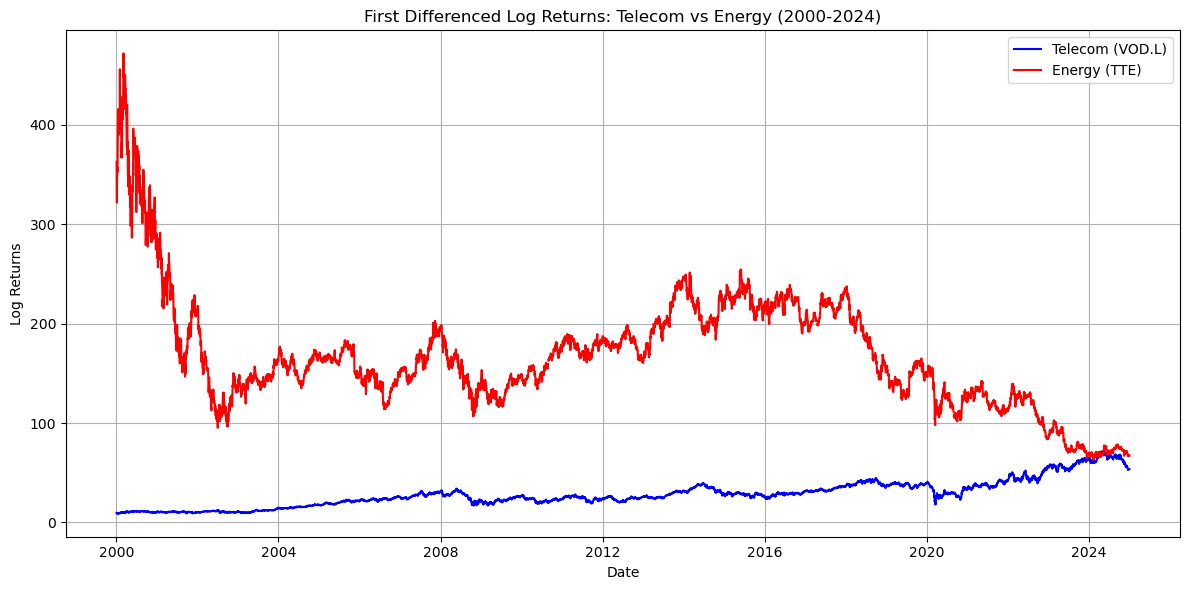

In [198]:
share_tc["return1"] = np.log(share_tc["VOD.L"]).diff()
share_tc["return2"] = np.log(share_tc["TTE"]).diff()

share_tc = pd.DataFrame(share_tc)
share_tc

# Plot both returns in one figure
plt.figure(figsize=(12, 6))
plt.plot(share_tc.index, share_tc.iloc[:, 0], label='Telecom (VOD.L)', color='blue')
plt.plot(share_tc.index, share_tc.iloc[:, 1], label='Energy (TTE)', color='red')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.title('First Differenced Log Returns: Telecom vs Energy (2000-2024)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("telecom_energy_log_returns.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

*From 2000 to 2024, the graphic shows the first-differenced log returns for TotalEnergies (Energy) and Vodafone Group (Telecom).  With sharp swings in the early 2000s and a subsequent slowdown in return variability, the energy sector (TTE) exhibits significant volatility.  The telecom industry (VOD.L), on the other hand, shows comparatively steady and lower returns throughout the course of the time.  This implies that whereas telecom stocks were more steady, energy companies had large market shocks, maybe as a result of changes in the price of oil or economic problems.  The recent convergence of both lines suggests that the energy sector has experienced less volatility, possibly as a result of market stability.*

In [200]:
share_tc.to_csv("telecom_energy_log_returns_2000_2024.csv")

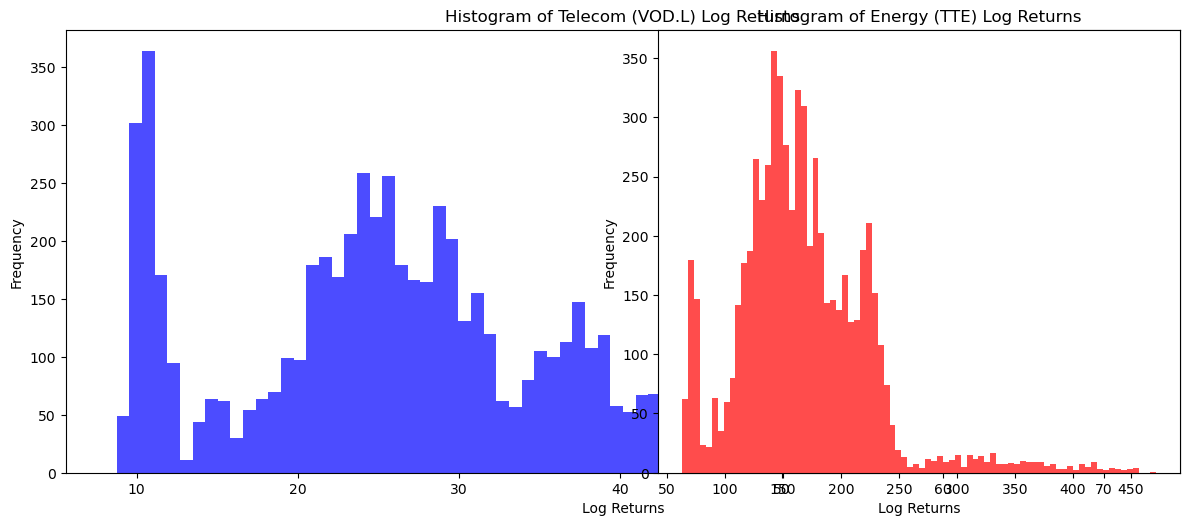

In [201]:
plt.figure(figsize=(12, 6))

# Histogram for Telecom stock (VOD.L)

plt.hist(share_tc.iloc[:, 0], bins=80, color='blue', alpha=0.7)
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Telecom (VOD.L) Log Returns')

# Histogram for Energy stock (TTE)
plt.subplot(1, 2, 2)
plt.hist(share_tc.iloc[:, 1], bins=80, color='red', alpha=0.7)
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Energy (TTE) Log Returns')

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("telecom_energy_log_returns_histograms.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

*The log return distributions for energy (TotalEnergies) and telecom (Vodafone Group) are shown in the histograms.  Despite possible small skewness or heavy tails, the Energy sector (right histogram, red) seems to follow a bell-shaped distribution.  This points to a distribution that is almost normal, however there may be some deviations.*

*With extremely negative returns, the telecom industry (left histogram, blue) exhibits a highly skewed and asymmetric distribution.  Given that normal distributions are symmetric around the mean, this suggests that its log returns are not normally distributed.*

*To verify normalcy, a formal test would be required, such as the Shapiro-Wilk or Kolmogorov-Smirnov test.  On the other hand, Energy returns seem more normal than Telecom.*

In [203]:
share_tc.describe()

Ticker,TTE,VOD.L,return1,return2
count,6288.000000,6364.000000,6281.000000,6129.000000
mean,28.492805,167.827690,-0.000254,0.000363
std,13.552321,57.886609,0.019522,0.018181
min,8.756218,62.953327,-0.159010,-0.196268
25%,20.496126,132.905338,-0.009611,-0.008700
50%,26.341676,161.115234,0.000000,0.000939
75%,35.563606,198.624535,0.009178,0.009767
max,71.560471,471.989471,0.119474,0.142156


*The stock prices and returns of Vodafone (VOD.L) and TotalEnergies (TTE) are contrasted in the summary data.  Compared to VOD.L (mean: 167.83, std: 57.89), TTE has a lower mean price (28.49) and higher volatility (std: 13.55).  With a slightly positive mean return (0.000363) for VOD.L and a negative one (-0.000254) for TTE, the returns (return1 for TTE and return2 for VOD.L) show modest average daily variations.  Higher volatility (std: ~0.018–0.019) and notable positive and negative swings are present in both equities.  Since the median return for both is close to zero, it indicates that market and sector variations are reflected in the frequent little price changes and sporadic dramatic swings.*

In [205]:
correlation = share_tc.corr()
print("\nCorrelation: ",correlation)

# Skewness and Kurtosis
skewness = share_tc.skew()
kurtosis = share_tc.kurtosis()
print("\nSkewness: ",skewness)
print("Kurtosis: ",kurtosis)


Correlation:  Ticker        TTE     VOD.L   return1   return2
Ticker                                         
TTE      1.000000 -0.478267  0.001005  0.017058
VOD.L   -0.478267  1.000000  0.028414  0.007175
return1  0.001005  0.028414  1.000000  0.285886
return2  0.017058  0.007175  0.285886  1.000000

Skewness:  Ticker
TTE        0.920021
VOD.L      1.262141
return1   -0.073906
return2   -0.402342
dtype: float64
Kurtosis:  Ticker
TTE         0.768446
VOD.L       3.511484
return1     5.039727
return2    10.142393
dtype: float64


*Relationships between TotalEnergies (TTE), Vodafone (VOD.L), and their individual returns are shown in the correlation matrix.  The somewhat negative correlation (-0.478) between TTE and VOD.L indicates that their stock values somewhat move in different directions.  Daily price fluctuations are generally independent, though, as seen by the extremely poor correlations between their returns (return1 for TTE and return2 for VOD.L) (0.017).  Return1 and return2 have the greatest correlation (0.286), indicating a weak association between the returns of the two stocks.  Overall, the data suggests that although there may be some negative link between stock prices, there is little correlation between their returns.*

In [248]:
model = smf.ols(formula='return1 ~ return2', data=share_tc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                return1   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     530.6
Date:                Fri, 28 Feb 2025   Prob (F-statistic):          1.55e-112
Time:                        06:43:24   Log-Likelihood:                 15288.
No. Observations:                5963   AIC:                        -3.057e+04
Df Residuals:                    5961   BIC:                        -3.056e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0004      0.000     -1.527      0.1

*The findings of the Ordinary Least Squares (OLS) regression shed light on the connection between Vodafone's (VOD.L) and TotalEnergies' (TTE) log returns.  Vodafone's returns can only account for 8.2% of the volatility in TTE's returns, according to the R-squared value of 0.082.  This shows that although the two stocks have a statistically significant association, it is weak, indicating that other variables have a far bigger impact on TTE's price fluctuations.*

*The model's overall significance is confirmed by the F-statistic of 530.6, which has a p-value that is practically equivalent to zero.  This indicates that, despite the weakness of the link, return2 (Vodafone's log returns) does have some explanatory power over return1 (TotalEnergies' log returns).  The fact that the intercept of -0.0004 is not statistically significant (p = 0.127) indicates that TotalEnergies' returns do not substantially deviate from zero when Vodafone's returns are zero.  With a p-value below 0.001, the coefficient for return2 is 0.3044, suggesting that a little but positive rise in TotalEnergies' returns is linked to an increase in Vodafone's returns.*

*The model's residuals show little to no autocorrelation, according to the Durbin-Watson value of 2.051, which shows that previous mistakes have minimal bearing on subsequent errors.  However, as demonstrated by a high kurtosis value of 8.273 and a p-value of virtually zero, the Jarque-Bera test for normalcy strongly rejects the null hypothesis of normalcy.  This implies that extreme values are more common than anticipated since the residuals have larger tails than a normal distribution.*

*Overall, the model has a weak explanatory power while being statistically significant.  A straightforward linear regression might not be the most effective method for simulating the relationship between these two equities, as seen by the poor correlation and non-normal residuals.  To increase predicted accuracy, more complex modeling strategies could be required, such as utilizing non-linear models or adding more explanatory factors.*

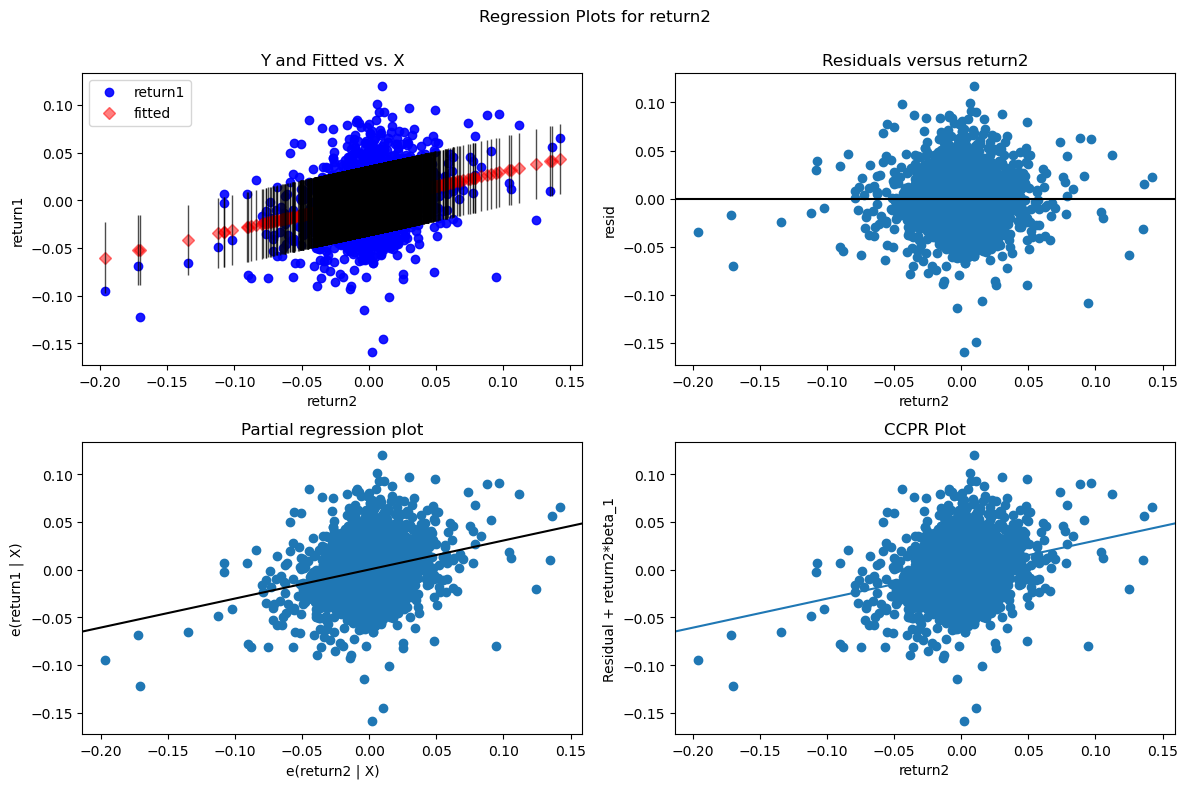

In [209]:
resid_plot_UR = plt.figure(figsize=(12,8))

# produce regression plots by creating an object fig
fig = sm.graphics.plot_regress_exog(model, 'return2', fig=resid_plot_UR)

*The provided content appears to describe regression plots related to the analysis of stock returns, specifically focusing on the relationship between two variables, return1 and return2. Here's an explanation of the key components:*

*Y and Fitted vs. X Plot:
This plot likely shows the relationship between the actual values of return1 (Y) and the fitted values from the regression model against return2 (X). The fitted values represent the predicted return1 based on the regression equation. The plot helps visualize how well the model captures the relationship between the two variables. If the fitted line closely follows the actual data points, it indicates a good fit.*

*Residuals versus return2 Plot:
This plot displays the residuals (the differences between the actual and predicted values of return1) against return2. Ideally, residuals should be randomly scattered around zero, indicating that the model's errors are normally distributed and there is no pattern in the errors. Any systematic pattern in the residuals might suggest that the model is missing some explanatory variables or that there is non-linearity in the relationship.*

*Partial Regression Plot:
This plot helps in understanding the relationship between return1 and return2 after accounting for the effects of other variables in the model. It shows the partial residuals (the residuals after removing the effect of other predictors) against return2. This plot is useful for diagnosing the influence of individual predictors in a multiple regression model.*

*CCPR Plot (Component-Component Plus Residual Plot):
This plot is similar to the partial regression plot but provides a more detailed view of the relationship between the dependent variable and a specific predictor, adjusting for other predictors. It helps in identifying non-linear relationships or outliers that might affect the regression results.*

*Overall, these plots are essential diagnostic tools in regression analysis. They help assess the model's fit, check for assumptions like linearity and homoscedasticity, and identify potential issues such as outliers or influential data points. Proper interpretation of these plots can lead to a more accurate and reliable regression model.*